In [52]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
DATADIR="C:\Datasets\PetImages"
train=["TRAIN2"]
train_X = np.array([]);
train_Y = np.array([]);
size_x = 22;
size_y = 40;
size = 100;
for categories in train:
    path=os.path.join(DATADIR,categories)
    files = os.listdir(path)
    random.shuffle(files)
    for img in files:
        X1=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        X1 = cv2.resize(X1, (size, size), interpolation = cv2.INTER_AREA)
        X1 = X1[8:30, 30:70]
        #plt.imshow(X1)
        #plt.show()
        if (train_X.size == 0):
            train_X = np.array([X1])
        else:
            train_X = np.append(train_X, [X1], axis = 0)
        train_Y = np.append(train_Y, int(img[3]) - 1)       
train_Y = train_Y.astype(int)

In [53]:
test=["TEST2"]
test_X = np.array([]);
test_Y = np.array([]);
for categories in test:
    path=os.path.join(DATADIR,categories)
    files = os.listdir(path)
    random.shuffle(files)
    for img in files:
        X2=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        X2 = cv2.resize(X2, (size, size))
        X2 = X2[8:30, 30:70]
        #plt.imshow(X2)
        #plt.show()
        if (test_X.size == 0):
            test_X = np.array([X2])
        else:
            test_X = np.append(test_X, [X2], axis = 0)
        test_Y = np.append(test_Y, int(img[3]) - 1)
test_Y = test_Y.astype(int)

In [54]:
from keras.utils import to_categorical
%matplotlib inline
print('Forme de données de formation : ', train_X.shape, train_Y.shape)
print('Forme de données de test : ', test_X.shape, test_Y.shape)

Forme de données de formation :  (3000, 22, 40) (3000,)
Forme de données de test :  (2000, 22, 40) (2000,)


In [55]:
# Trouver les numéros uniques à partir des étiquettes de train
classes = np.unique(train_Y)
nClasses = len(classes)
print('Nombre total de sorties : ', nClasses)
print('Classes de sortie : ', classes)

Nombre total de sorties :  5
Classes de sortie :  [0 1 2 3 4]


Text(0.5, 1.0, 'Vérité-terrain : 1')

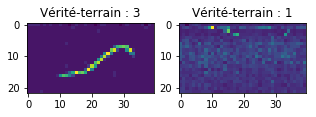

In [56]:
plt.figure(figsize=[5,5])
# Afficher la première image dans les données d'apprentissage
plt.subplot(121)
plt.imshow(train_X[0,:,:])
plt.title("Vérité-terrain : {}".format(train_Y[0]))
# Afficher la première image dans les données de test
plt.subplot(122)
plt.imshow(test_X[0,:,:])
plt.title("Vérité-terrain : {}".format(test_Y[0]))

In [57]:
train_X = train_X.reshape(-1, size_x, size_y, 1)
test_X = test_X.reshape(-1, size_x, size_y, 1)
train_X.shape, test_X.shape

((3000, 22, 40, 1), (2000, 22, 40, 1))

In [58]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [59]:
# Changer les étiquettes d'un codage catégorique à un codage one-hot
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
# Afficher la modification pour l’étiquette de catégorie en utilisant le codage one-hot
print('Étiquette originale :', train_Y[0])
print('Après conversion en one-hot :', train_Y_one_hot[0])

Étiquette originale : 3
Après conversion en one-hot : [0. 0. 0. 1. 0.]


In [60]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [61]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((2400, 22, 40, 1), (600, 22, 40, 1), (2400, 5), (600, 5))

In [62]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [63]:
batch_size = 64
epochs = 20
num_classes = 5

In [64]:
sifflement_model = Sequential()
sifflement_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(size_x, size_y,1),padding='same'))
sifflement_model.add(LeakyReLU(alpha=0.1))
sifflement_model.add(MaxPooling2D((2, 2),padding='same'))
sifflement_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
sifflement_model.add(LeakyReLU(alpha=0.1))
sifflement_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
sifflement_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
sifflement_model.add(LeakyReLU(alpha=0.1))                  
sifflement_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
sifflement_model.add(Flatten())
sifflement_model.add(Dense(128, activation='linear'))
sifflement_model.add(LeakyReLU(alpha=0.1))                  
sifflement_model.add(Dense(num_classes, activation='softmax'))

In [65]:
sifflement_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [66]:
sifflement_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 22, 40, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 22, 40, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 20, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 20, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 11, 20, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 10, 64)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 10, 128)        73856     
__________

In [16]:
sifflement_train = sifflement_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Instructions for updating:
Use tf.cast instead.
Train on 2400 samples, validate on 600 samples
Epoch 1/20
2400/2400 [==============================] - 6s 2ms/step - loss: 1.5971 - acc: 0.2462 - val_loss: 1.4929 - val_acc: 0.5333
Epoch 2/20
2400/2400 [==============================] - 5s 2ms/step - loss: 1.0132 - acc: 0.5500 - val_loss: 0.6443 - val_acc: 0.6283
Epoch 3/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.5488 - acc: 0.7329 - val_loss: 0.4136 - val_acc: 0.9100
Epoch 4/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.3863 - acc: 0.8483 - val_loss: 0.3224 - val_acc: 0.8633
Epoch 5/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.3084 - acc: 0.8808 - val_loss: 0.2350 - val_acc: 0.9217
Epoch 6/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.2297 - acc: 0.9217 - val_loss: 0.2069 - val_acc: 0.9317
Epoch 7/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.1741 - acc: 0.9379 - va

In [17]:
test_eval = sifflement_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [18]:
print('Test de perte :', test_eval[0])
print('Test de précision :', test_eval[1])

Test de perte : 0.25720605228992643
Test de précision : 0.944


In [19]:
accuracy = sifflement_train.history['acc']
val_accuracy = sifflement_train.history['val_acc']
loss = sifflement_train.history['loss']
val_loss = sifflement_train.history['val_loss']
epochs = range(len(accuracy))

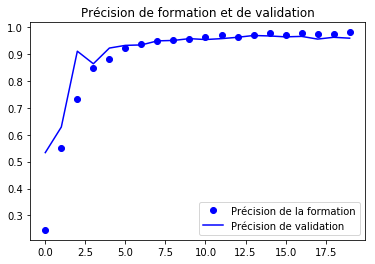

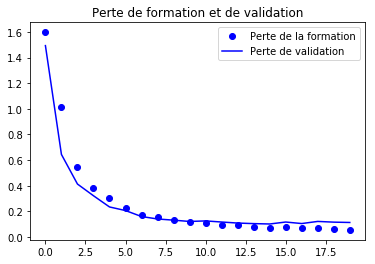

In [20]:
plt.plot(epochs, accuracy, 'bo', label='Précision de la formation')
plt.plot(epochs, val_accuracy, 'b', label='Précision de validation')
plt.title('Précision de formation et de validation')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Perte de la formation')
plt.plot(epochs, val_loss, 'b', label='Perte de validation')
plt.title('Perte de formation et de validation')
plt.legend()
plt.show()

In [21]:
batch_size = 64
epochs = 20
num_classes = 5

In [22]:
sifflement_model = Sequential()
sifflement_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(size_x,size_y,1)))
sifflement_model.add(LeakyReLU(alpha=0.1))
sifflement_model.add(MaxPooling2D((2, 2),padding='same'))
sifflement_model.add(Dropout(0.25))
sifflement_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
sifflement_model.add(LeakyReLU(alpha=0.1))
sifflement_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
sifflement_model.add(Dropout(0.25))
sifflement_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
sifflement_model.add(LeakyReLU(alpha=0.1))                  
sifflement_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
sifflement_model.add(Dropout(0.4))
sifflement_model.add(Flatten())
sifflement_model.add(Dense(128, activation='linear'))
sifflement_model.add(LeakyReLU(alpha=0.1))           
sifflement_model.add(Dropout(0.3))
sifflement_model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
sifflement_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 22, 40, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 22, 40, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 20, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 20, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 20, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 11, 20, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 10, 64)         0         
__________

In [24]:
sifflement_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [25]:
sifflement_train_dropout = sifflement_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 2400 samples, validate on 600 samples
Epoch 1/20
2400/2400 [==============================] - 7s 3ms/step - loss: 1.6131 - acc: 0.1992 - val_loss: 1.6089 - val_acc: 0.2000
Epoch 2/20
2400/2400 [==============================] - 5s 2ms/step - loss: 1.6037 - acc: 0.2421 - val_loss: 1.5822 - val_acc: 0.3983
Epoch 3/20
2400/2400 [==============================] - 5s 2ms/step - loss: 1.3402 - acc: 0.4083 - val_loss: 0.8952 - val_acc: 0.5950
Epoch 4/20
2400/2400 [==============================] - 6s 2ms/step - loss: 0.8258 - acc: 0.5854 - val_loss: 0.6855 - val_acc: 0.6783
Epoch 5/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.6722 - acc: 0.6596 - val_loss: 0.5430 - val_acc: 0.7233
Epoch 6/20
2400/2400 [==============================] - 5s 2ms/step - loss: 0.5503 - acc: 0.7258 - val_loss: 0.4146 - val_acc: 0.8767
Epoch 7/20
2400/2400 [==============================] - 6s 2ms/step - loss: 0.4532 - acc: 0.7987 - val_loss: 0.3521 - val_acc: 0.9183
Epoch 8/20
2400

In [26]:
sifflement_model.save("sifflement_model_dropout.h5py")

In [27]:
test_eval = sifflement_model.evaluate(test_X, test_Y_one_hot, verbose=1)

2000/2000 [==============================] - 1s 624us/step


In [28]:
print('Test de perte :', test_eval[0])
print('Test de précision :', test_eval[1])

Test de perte : 0.15690120411477984
Test de précision : 0.9425


In [29]:
accuracy = sifflement_train_dropout.history['acc']
val_accuracy = sifflement_train_dropout.history['val_acc']
loss = sifflement_train_dropout.history['loss']
val_loss = sifflement_train_dropout.history['val_loss']
epochs = range(len(accuracy))

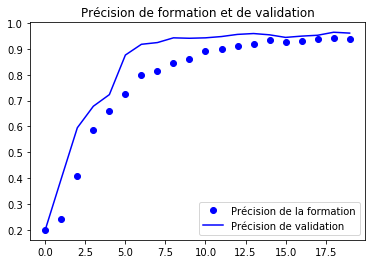

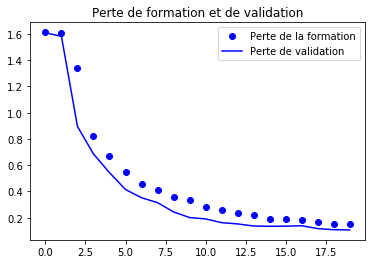

In [30]:
plt.plot(epochs, accuracy, 'bo', label='Précision de la formation')
plt.plot(epochs, val_accuracy, 'b', label='Précision de validation')
plt.title('Précision de formation et de validation')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Perte de la formation')
plt.plot(epochs, val_loss, 'b', label='Perte de validation')
plt.title('Perte de formation et de validation')
plt.legend()
plt.show()

In [31]:
classes_prédites = sifflement_model.predict(test_X)
classes_prédites = np.argmax(np.round(classes_prédites),axis=1)

In [32]:
classes_prédites.shape, test_Y.shape

((2000,), (2000,))

In [45]:
correctes = np.where(classes_prédites==test_Y)[0]
print ("%d étiquettes correctes trouvées" % len(correctes))

1886 étiquettes correctes trouvées


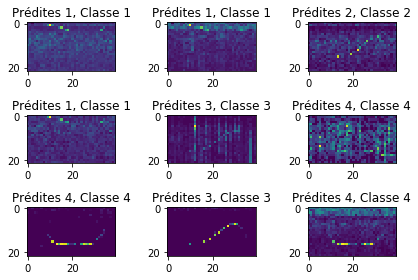

In [46]:
for i, correctes in enumerate(correctes[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correctes].reshape(size_x,size_y),  interpolation='none')
    plt.title("Prédites {}, Classe {}".format(classes_prédites[correctes], test_Y[correctes]))
    plt.tight_layout()

In [47]:
incorrectes = np.where(classes_prédites!=test_Y)[0]
print ("%d étiquettes incorrectes trouvées" % len(incorrectes))

114 étiquettes incorrectes trouvées


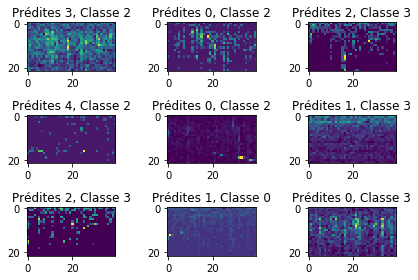

In [48]:
for i, incorrectes in enumerate(incorrectes[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrectes].reshape(size_x,size_y),  interpolation='none')
    plt.title("Prédites {}, Classe {}".format(classes_prédites[incorrectes], test_Y[incorrectes]))
    plt.tight_layout()

In [49]:
from sklearn.metrics import classification_report
target_names = ["Classe {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, classes_prédites, target_names=target_names))

              precision    recall  f1-score   support

    Classe 0       0.89      0.95      0.92       400
    Classe 1       0.96      0.94      0.95       400
    Classe 2       0.93      0.93      0.93       400
    Classe 3       0.97      0.92      0.94       400
    Classe 4       0.98      0.98      0.98       400

   micro avg       0.94      0.94      0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

